# Overview of Machine Learning Algorithms in Python

## Library Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Supervised Learning

### Linear Regression

In [2]:
from sklearn import linear_model

df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Visualization

Text(0.5, 38.065625, 'Explanatory')

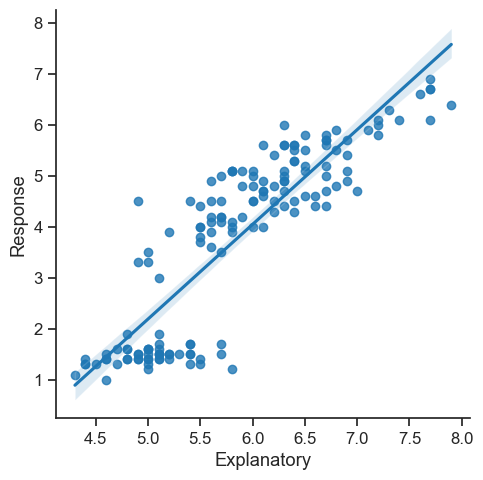

In [3]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot(x = 'sepal_length', y = 'petal_length', data=df)
plt.ylabel('Response')
plt.xlabel('Explanatory')

#### Implementation 

In [4]:
linear = linear_model.LinearRegression()

trainX = np.asarray(df.sepal_length[:112]).reshape(-1, 1)
trainY = np.asarray(df.petal_length[:112]).reshape(-1, 1)

testX = np.asarray(df.sepal_length[112:len(df.sepal_length)]).reshape(-1, 1)
testY = np.asarray(df.petal_length[112:len(df.petal_length)]).reshape(-1, 1)

linear.fit(trainX, trainY)
linear.score(trainX, trainY)

print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print('R^2 Value: \n', linear.score(trainX, trainY))

predicted = linear.predict(testX)

Coefficient: 
 [[1.88854152]]
Intercept: 
 [-7.38803956]
R^2 Value: 
 0.7104013167516402


### Logistic Regression

#### Getting Started

In [5]:
from sklearn.linear_model import LogisticRegression
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])
df_2categ = df.iloc[:100]
df_2categ

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


#### Visualization

Text(0.5, 0, 'Explanatory')

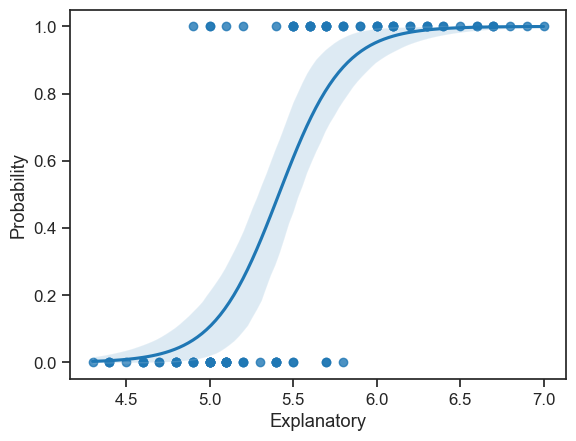

In [7]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.regplot(x = 'sepal_length', y = 'species', data=df_2categ, logistic=True)
plt.ylabel('Probability')
plt.xlabel('Explanatory')

#### Implementation

In [8]:
logistic = LogisticRegression()
X = (np.asarray(df.sepal_length)).reshape(-1, 1)
Y = (np.asarray(df.species)).ravel()

logistic.fit(X, Y)
logistic.score(X, Y)

print('Coefficient: \n', logistic.coef_)
print('Intercept: \n', logistic.intercept_)
print('R^2 Value: \n', logistic.score(X, Y))

Coefficient: 
 [[-2.74403556]
 [ 0.55485215]
 [ 2.18918341]]
Intercept: 
 [ 15.36624329  -2.59659765 -12.76964563]
R^2 Value: 
 0.7466666666666667


## Unsupervised Learning

### K-Means Clustering

#### Getting Started

In [11]:
from sklearn.cluster import KMeans
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Implementation

In [13]:
from sklearn.model_selection import train_test_split

kmeans = KMeans(n_clusters=3)
X = df.values[:, 0:2]
kmeans.fit(X)
df['Pred'] = kmeans.predict(X)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Pred
0,5.1,3.5,1.4,0.2,setosa,2
1,4.9,3.0,1.4,0.2,setosa,2
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,2
4,5.0,3.6,1.4,0.2,setosa,2


#### Visualization

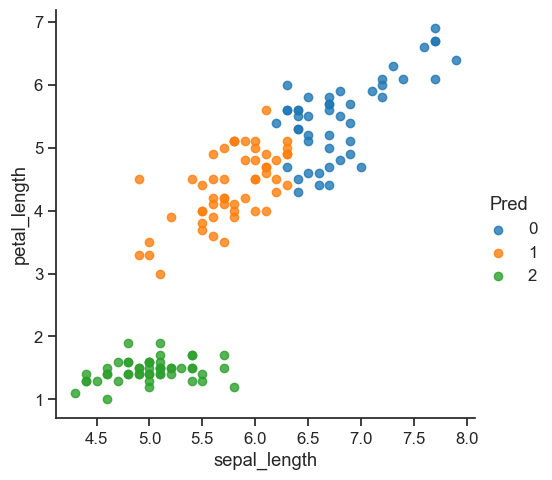

In [17]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.lmplot(x = 'sepal_length', y = 'petal_length', scatter=True, fit_reg=False, data=df, hue = 'Pred')